In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('dc_combined.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 98 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Seq                     1215675 non-null  int64  
 1   Dur                     1215675 non-null  float64
 2   RunTime                 1215675 non-null  float64
 3   Mean                    1215675 non-null  float64
 4   Sum                     1215675 non-null  float64
 5   Min                     1215675 non-null  float64
 6   Max                     1215675 non-null  float64
 7   sTos                    1215675 non-null  float64
 8   dTos                    1215675 non-null  float64
 9   sTtl                    1215675 non-null  float64
 10  dTtl                    1215675 non-null  float64
 11  sHops                   1215675 non-null  float64
 12  dHops                   1215675 non-null  float64
 13  TotPkts                 1215675 non-null  int64  
 14  Sr

In [30]:
X = data.drop(['Label', 'Attack Type', 'Attack Tool'], axis=1)

# X =  X.loc[:,~X.columns.str.startswith('Atk')]
# X =  X.loc[:,~X.columns.str.startswith('Attack')]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 95 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Seq                     1215675 non-null  int64  
 1   Dur                     1215675 non-null  float64
 2   RunTime                 1215675 non-null  float64
 3   Mean                    1215675 non-null  float64
 4   Sum                     1215675 non-null  float64
 5   Min                     1215675 non-null  float64
 6   Max                     1215675 non-null  float64
 7   sTos                    1215675 non-null  float64
 8   dTos                    1215675 non-null  float64
 9   sTtl                    1215675 non-null  float64
 10  dTtl                    1215675 non-null  float64
 11  sHops                   1215675 non-null  float64
 12  dHops                   1215675 non-null  float64
 13  TotPkts                 1215675 non-null  int64  
 14  Sr

In [21]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-1.        , -1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.99998542, -1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.99997085, -0.49820663, -0.49820663, ..., -1.        ,
         1.        , -1.        ],
       ...,
       [-0.98887828, -0.98996749, -0.98996749, ..., -1.        ,
         1.        , -1.        ],
       [-0.99997085, -0.86869371, -0.86869371, ..., -1.        ,
         1.        , -1.        ],
       [-1.        , -0.95212973, -0.95212973, ..., -1.        ,
         1.        , -1.        ]])

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-1.06823889, -0.80708458, -0.80708458, ..., -0.11514144,
         1.24330163, -1.24330163],
       [-1.06821241, -0.80708458, -0.80708458, ..., -0.11514144,
         1.24330163, -1.24330163],
       [-1.06818594,  2.1479625 ,  2.1479625 , ..., -0.11514144,
         1.24330163, -1.24330163],
       ...,
       [-1.04803857, -0.74800338, -0.74800338, ..., -0.11514144,
         1.24330163, -1.24330163],
       [-1.06818594, -0.03382552, -0.03382552, ..., -0.11514144,
         1.24330163, -1.24330163],
       [-1.06823889, -0.52517788, -0.52517788, ..., -0.11514144,
         1.24330163, -1.24330163]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
Principal_components=pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15'])
print(pca_df)

             PC 1       PC 2       PC 3       PC 4      PC 5      PC 6  \
0       -2.885232   0.390523  -1.204457   3.783324 -0.789132  1.163554   
1       -2.885238   0.390522  -1.204452   3.783323 -0.789131  1.163544   
2        5.205590   7.540418  12.257068   8.488165 -0.994047  5.796417   
3        4.854739   7.053818  11.426652   7.850745 -0.929431  5.362843   
4        5.463170   7.967632  12.950344   9.054804 -1.058602  6.187790   
...           ...        ...        ...        ...       ...       ...   
1215670 -8.503760  39.730326 -12.903729 -12.808219  0.943485  0.304212   
1215671 -6.104926  35.401090 -11.361629 -10.250325  0.671062 -0.346389   
1215672  0.313977   2.034191  -2.340035   2.480853 -0.643047  0.457668   
1215673 -6.054478  35.317586 -10.509537 -11.087070  0.768101 -0.190670   
1215674 -8.140715  39.873941 -12.467539 -12.935539  0.973890  0.313676   

             PC 7      PC 8      PC 9     PC 10     PC 11     PC 12     PC 13  \
0       -1.356537 -0.603582  0

In [42]:
for_visual = pd.concat([pca_df, data['Attack Type']], axis = 1)
print(for_visual)

             PC 1       PC 2       PC 3       PC 4      PC 5      PC 6  \
0       -2.885232   0.390523  -1.204457   3.783324 -0.789132  1.163554   
1       -2.885238   0.390522  -1.204452   3.783323 -0.789131  1.163544   
2        5.205590   7.540418  12.257068   8.488165 -0.994047  5.796417   
3        4.854739   7.053818  11.426652   7.850745 -0.929431  5.362843   
4        5.463170   7.967632  12.950344   9.054804 -1.058602  6.187790   
...           ...        ...        ...        ...       ...       ...   
1215670 -8.503760  39.730326 -12.903729 -12.808219  0.943485  0.304212   
1215671 -6.104926  35.401090 -11.361629 -10.250325  0.671062 -0.346389   
1215672  0.313977   2.034191  -2.340035   2.480853 -0.643047  0.457668   
1215673 -6.054478  35.317586 -10.509537 -11.087070  0.768101 -0.190670   
1215674 -8.140715  39.873941 -12.467539 -12.935539  0.973890  0.313676   

             PC 7      PC 8      PC 9     PC 10     PC 11     PC 12     PC 13  \
0       -1.356537 -0.603582  0

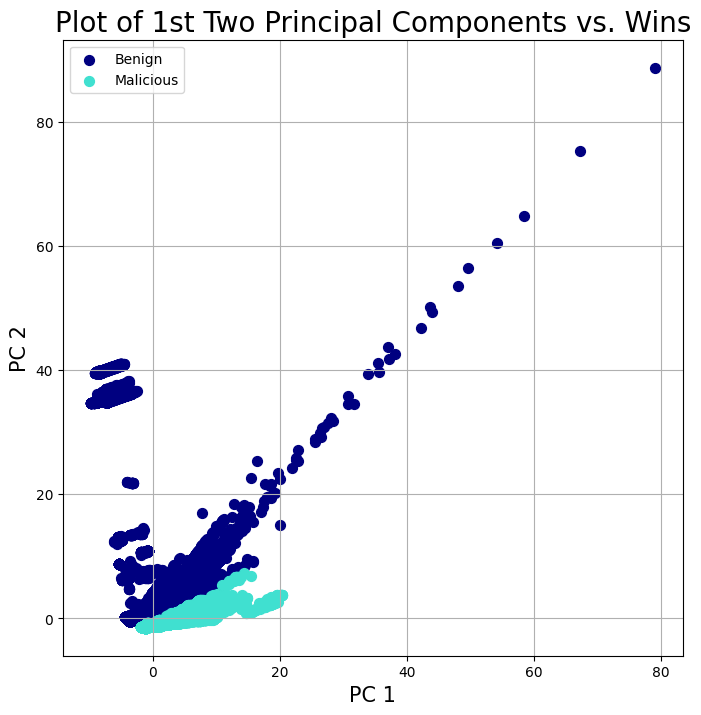

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Wins', fontsize = 20)
W_GROUP = ['Benign','Malicious']
colors = ['navy', 'turquoise']
for WINS_GROUP, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['Label'] == WINS_GROUP
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(W_GROUP)
ax.grid()

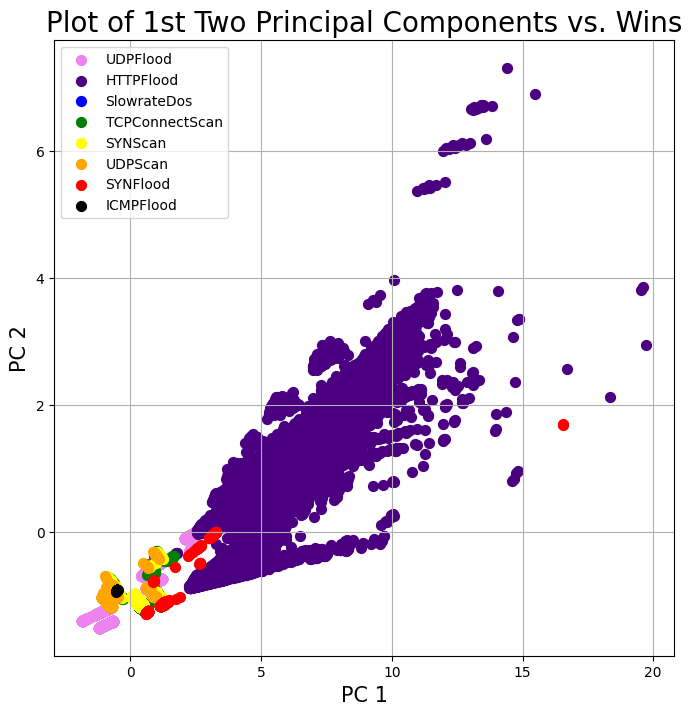

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Wins', fontsize = 20)
W_GROUP = ['UDPFlood', 'HTTPFlood', 'SlowrateDos', 'TCPConnectScan', 'SYNScan', 'UDPScan', 'SYNFlood', 'ICMPFlood']
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red', 'black']
for WINS_GROUP, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['Attack Type'] == WINS_GROUP
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(W_GROUP)
ax.grid()

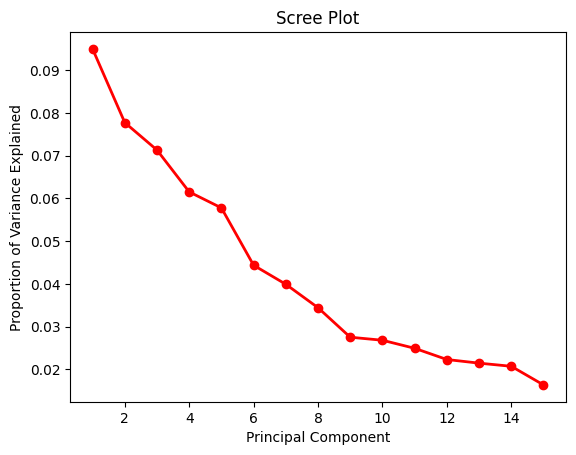

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [36]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)

out_sum = np.cumsum(pca.explained_variance_ratio_)
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.09497472 0.07774937 0.07132245 0.06153778 0.05779584 0.04438035
 0.03993437 0.03445115 0.02754904 0.02684155 0.02495829 0.022335
 0.02148574 0.0207515  0.01639259]
Cumulative Prop. Variance Explained:  [0.09497472 0.1727241  0.24404655 0.30558433 0.36338016 0.40776052
 0.44769488 0.48214603 0.50969507 0.53653661 0.56149491 0.58382991
 0.60531564 0.62606714 0.64245973]


In [37]:
print(pca.explained_variance_)

[9.02260628 7.3861966  6.77563858 5.84609369 5.49060886 4.21613687
 3.79376807 3.27286174 2.61716063 2.5499489  2.37103991 2.12182661
 2.0411468  1.97139402 1.55729723]


In [38]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15'], index=X.columns)
loadings

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
Seq,-0.159514,-0.030893,0.140731,-0.016830,0.024192,-0.242619,-0.027227,-0.086190,-0.001505,0.003894,-0.058552,-0.163237,0.031042,0.033570,0.008092
Dur,0.203904,0.071799,0.238420,-0.091933,0.019758,-0.003702,-0.168745,-0.046277,-0.000732,-0.023950,-0.008870,-0.079288,0.022628,-0.047847,-0.004934
RunTime,0.203904,0.071799,0.238420,-0.091933,0.019758,-0.003702,-0.168745,-0.046277,-0.000732,-0.023950,-0.008870,-0.079288,0.022628,-0.047847,-0.004934
Mean,0.203904,0.071799,0.238420,-0.091933,0.019758,-0.003702,-0.168745,-0.046277,-0.000732,-0.023950,-0.008870,-0.079288,0.022628,-0.047847,-0.004934
Sum,0.203904,0.071799,0.238420,-0.091933,0.019758,-0.003702,-0.168745,-0.046277,-0.000732,-0.023950,-0.008870,-0.079288,0.022628,-0.047847,-0.004934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AtkType_TCPConnectScan,0.007993,-0.020565,-0.070400,0.021323,-0.012737,0.083205,0.024491,0.048786,-0.003296,-0.186228,-0.075542,-0.162187,0.061403,0.044465,-0.018403
AtkType_UDPFlood,0.023365,-0.100257,0.044587,-0.315092,0.058462,0.157711,0.093764,0.106705,0.002735,0.160682,0.094734,0.078561,0.020777,-0.017970,0.027531
AtkType_UDPScan,-0.011585,-0.017024,-0.049206,0.033862,-0.014236,0.161133,-0.004793,0.033444,-0.003350,-0.089727,-0.110142,-0.173947,-0.021130,-0.010679,0.039077
Label_Benign,-0.214143,0.100299,0.136598,0.205179,-0.021240,-0.137485,-0.079992,-0.062261,-0.000822,-0.025579,-0.022630,-0.010368,0.007805,0.017761,-0.004117
